<a href="https://colab.research.google.com/github/AkaMajed/MY-ALP-/blob/main/DAY_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#machine learning project 2
linear rigression

In [ ]:
#DATA
import pandas as pd
import numpy as np
#MATH LIBRARRY
import matplotlib.pyplot as plt #importing
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm


#For fun you could try doing Linear Regression by yourself

#we will just go ahead and use the function.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
file_path = '/content/housing.csv'

data = pd.read_csv(file_path)

In [ ]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

#missing data analysis (Cleaning Data)



In [ ]:
#check for missing values
missing_values = data.isnull().sum()
#calculate teh missing precentage of a data in each column
missing_percentage = (missing_values / len(data)) * 100
a=10
b=20
c=a/b
#displaying the missing data
print("missing values in each column:\n", missing_values)
print("missing percentage in each column:\n", missing_percentage)

missing values in each column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
missing percentage in each column:
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [ ]:
#remove the riws with missing data
data_cleaned1 = data.dropna()
#verify that this work
print("missing values in each column after removal:\n")
print(data_cleaned1.isnull().sum())


missing values in each column after removal:

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


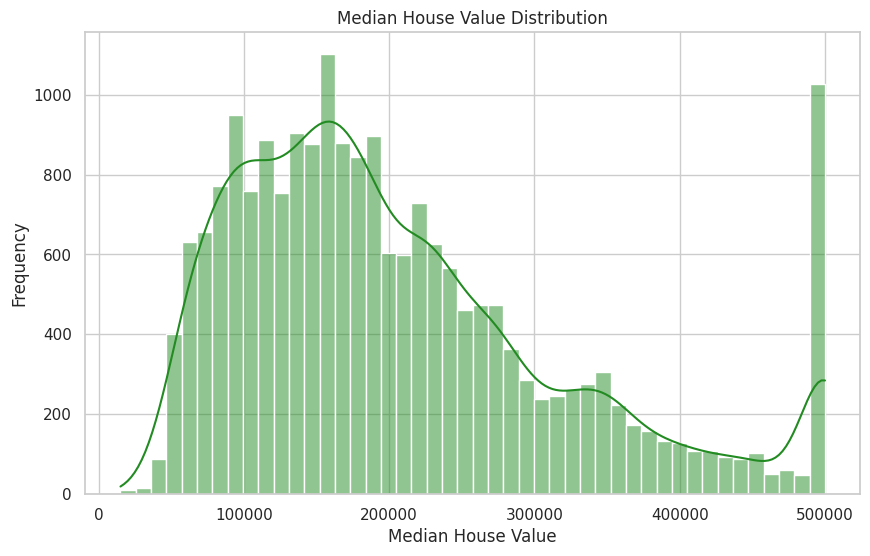

In [ ]:
#WE ARE CREATUBG A GRAPH / PLOT OF THE MEDIAN HOUSE
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned1['median_house_value'], color='forestgreen' , kde=True)
plt.title('Median House Value Distribution')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

#using interquartile range to remove outliers

In [ ]:
#ASSUMING 'DATA'IS YOUR DATA FRAME AND'MEDIAN_HOUSE_VALUE' IS THE COLUMN OF INTREST
Q1 = data_cleaned1['median_house_value'].quantile(0.25)
print(Q1)
Q3 = data_cleaned1['median_house_value'].quantile(0.75)
print(Q3)
IQR = Q3 - Q1
print(IQR)

119500.0
264700.0
145200.0


In [ ]:
#Define the bounds for the out liers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Remove outliers
data_no_outliers_1 = data_cleaned1[(data_cleaned1['median_house_value'] >= lower_bound) & (data_cleaned1['median_house_value'] <= upper_bound)]

# Check the shape of the data before and after removal of outliers
print("Original data shape:", data_cleaned1.shape)
print("New data shape without outliers:", data_no_outliers_1.shape)


Original data shape: (20433, 10)
New data shape without outliers: (19369, 10)


#BLOX PLOT FOR OUTLIERS DETECTION

##OUTLIERS IN MEDIAN INCOME



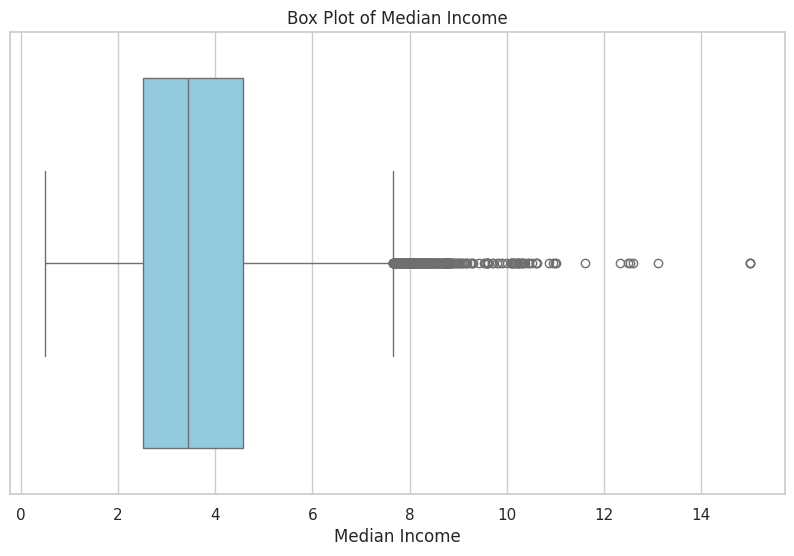

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_no_outliers_1['median_income'], color='skyblue')
plt.title('Box Plot of Median Income')
plt.xlabel('Median Income')
plt.show()

In [ ]:
# Calculate Q1 and Q3
Q1 = data_no_outliers_1['median_income'].quantile(0.25)
Q3 = data_no_outliers_1['median_income'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers_2 = data_no_outliers_1[(data_no_outliers_1['median_income'] >= lower_bound) & (data_no_outliers_1['median_income'] <= upper_bound)]

# Check the shape of the data before and after the removal of outliers
print("Original data shape:", data_no_outliers_1.shape)
print("Data shape without outliers:", data_no_outliers_2.shape)


Original data shape: (19369, 10)
Data shape without outliers: (19026, 10)


#select only numeric columns

In [ ]:
numeric_data = data_no_outliers_2.select_dtypes(include=[np.number])
data_cleaned2 = numeric_data

#heat map

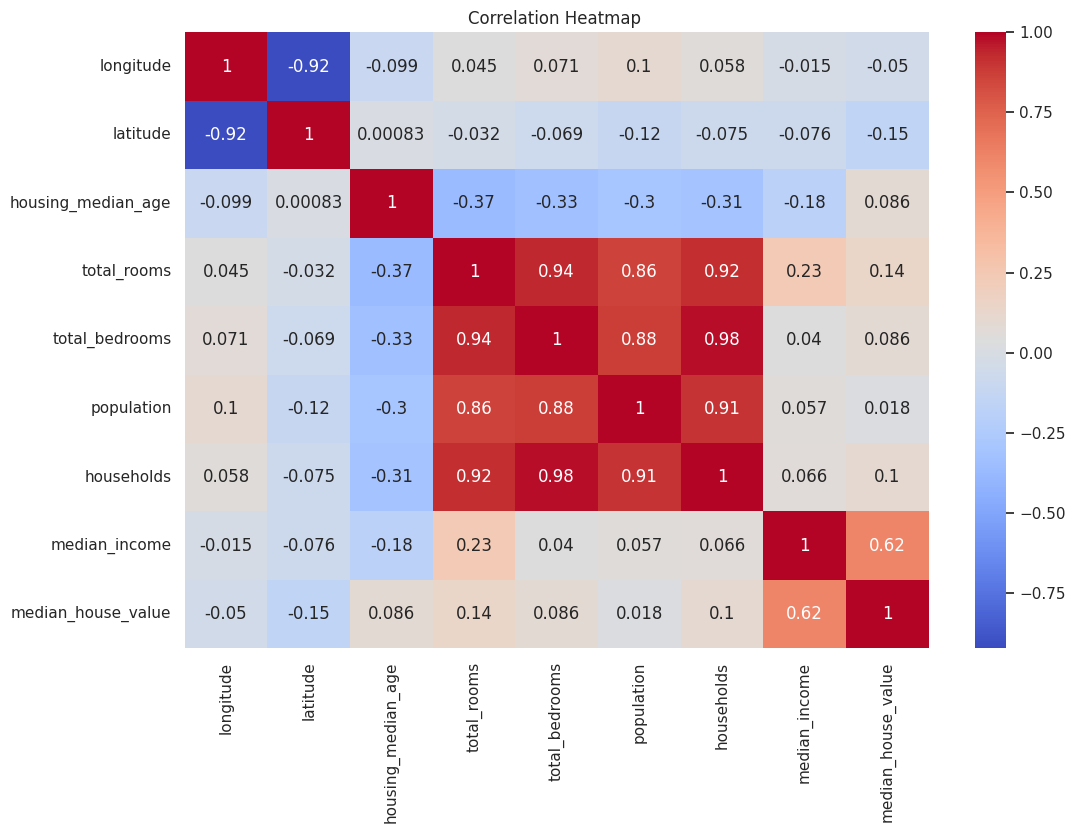

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_cleaned2.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap ')
plt.show()

Why do we drop total_bedrooms?

we drop it cause it has high coleration with hoeshold and total_rooms
and dont give us a new information for training the model

In [ ]:
data_cleaned2 = data.drop('total_bedrooms', axis= 1 )

In [ ]:
data_cleaned2.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

In [ ]:
#unique values in ocean proximity
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
data_no_outliers_2 = data_no_outliers_1[(data_no_outliers_1['median_income'] >= lower_bound) & (data_no_outliers_1['median_income'] <= upper_bound)]
data = data_no_outliers_2
data = data.drop('total_bedrooms', axis= 1 )
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

In [ ]:
for column in ['ocean_proximity']:
    print(f"Unique values in {column}:" , data[column].unique())


Unique values in ocean_proximity: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [ ]:
#dummy method ((for linear))
ocean_proximity_dummies = pd.get_dummies(data['ocean_proximity'], prefix='ocean_proximity').astype(int)
data = pd.concat([data.drop("ocean_proximity", axis=1), ocean_proximity_dummies], axis=1)
ocean_proximity_dummies

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [ ]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [ ]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
5,-122.25,37.85,52.0,919.0,413.0,193.0,4.0368,269700.0,0,0,0,1,0
6,-122.25,37.84,52.0,2535.0,1094.0,514.0,3.6591,299200.0,0,0,0,1,0
7,-122.25,37.84,52.0,3104.0,1157.0,647.0,3.1200,241400.0,0,0,0,1,0
8,-122.26,37.84,42.0,2555.0,1206.0,595.0,2.0804,226700.0,0,0,0,1,0
9,-122.25,37.84,52.0,3549.0,1551.0,714.0,3.6912,261100.0,0,0,0,1,0
10,-122.26,37.85,52.0,2202.0,910.0,402.0,3.2031,281500.0,0,0,0,1,0
11,-122.26,37.85,52.0,3503.0,1504.0,734.0,3.2705,241800.0,0,0,0,1,0


In [ ]:
data = data.drop("ocean_proximity_ISLAND" , axis=1)

In [ ]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [ ]:
#define our features(indpendent variables) and target (dependetnt variable)
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
target = ['median_house_value']
X = data[features]
y = data[target]

#split the data into a training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)
#check the size of the splits
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 15220 samples
Test set size: 3806 samples


In [ ]:
#TRAIN THE DATA
#X_test

In [ ]:
#X_train

In [ ]:
#ADD A Constant ,,,,, to understand this you need to study the linear regression
X_train_const = sm.add_constant(X_train)
X_train_const

,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2945,1.0,-118.98,35.35,21.0,496.0,511.0,124.0,1.7614,0,1,0,0
15435,1.0,-117.23,33.21,21.0,1934.0,861.0,381.0,3.6181,1,0,0,0
18926,1.0,-122.17,38.08,7.0,18392.0,8276.0,2742.0,6.4232,0,0,1,0
11777,1.0,-121.27,38.75,43.0,1292.0,647.0,249.0,2.7188,0,1,0,0
2683,1.0,-115.54,32.99,17.0,1697.0,911.0,254.0,4.3523,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11863,1.0,-121.24,40.31,36.0,1597.0,632.0,262.0,3.5962,0,1,0,0
4216,1.0,-118.27,34.11,36.0,1832.0,934.0,486.0,3.0521,1,0,0,0
8296,1.0,-118.14,33.76,52.0,2677.0,1144.0,624.0,4.3889,0,0,0,1
17301,1.0,-119.51,34.39,32.0,1921.0,951.0,334.0,3.2330,0,0,0,1


In [ ]:
model_fitted = sm.OLS(y_train, X_train_const).fit() #fits the model to the data

In [ ]:
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     1997.
Date:                Mon, 08 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:22:09   Log-Likelihood:            -1.8887e+05
No. Observations:               15220   AIC:                         3.778e+05
Df Residuals:                   15208   BIC:                         3.778e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [ ]:
#predicting and testing
X_test_const = sm.add_constant(X_test)
#make those predictions
test_predictions = model_fitted.predict(X_test_const)
test_predictions

14174    182161.432433
10159    299007.104048
12187    150728.807326
3663     231059.866373
1381     267679.786631
             ...      
19442     52769.114586
11721    126941.245162
18188    254629.514972
19928    148193.550786
6083     225798.348414
Length: 3806, dtype: float64

#CHECKING OLS ASSUMPTIONS

## ASSUMPTION 1: LINEARITY



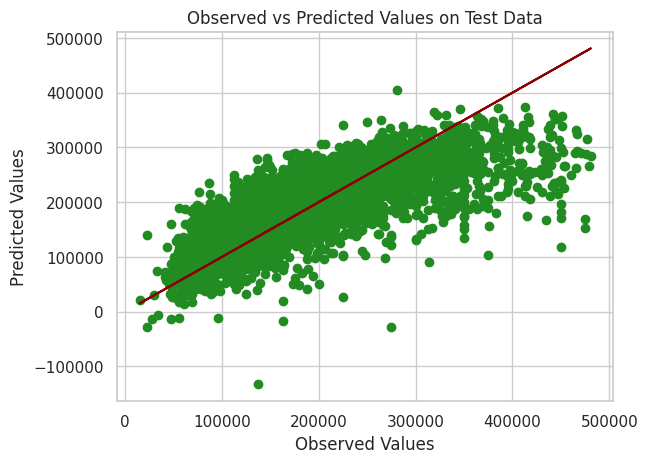

In [ ]:
# Scatter plot for observed vs predicted values on test data
plt.scatter(y_test, test_predictions, color = "forestgreen")
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values on Test Data')
plt.plot(y_test, y_test, color='darkred') # line for perfect prediction (true values)
plt.show()


##ASSUMPTION 2: RANDOM SAMPLE


In [ ]:
# Calculate the mean of the residuals
mean_residuals = np.mean(model_fitted.resid)

print(f"The mean of the residuals is {np.round(mean_residuals,2)}") #rounds to two decimal places

The mean of the residuals is 0.0


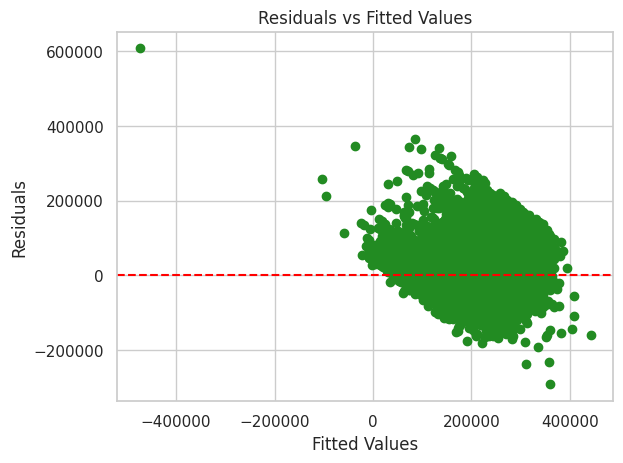

In [ ]:
# Plotting the residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "forestgreen")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

##ASSUMPTION 3: EXOGENEITY (THERE IS NO INTERNAL CORRELATION)



In [ ]:
# Calculate the residuals
residuals = model_fitted.resid

# Check for correlation between residuals and each predictor
for column in X_train.columns:
  corr_coefficient = np.corrcoef(X_train[column], residuals)[0, 1]
  print(f'Correlation between residuals and {column}: {np.round(corr_coefficient,2)}')


Correlation between residuals and longitude: -0.0
Correlation between residuals and latitude: 0.0
Correlation between residuals and housing_median_age: 0.0
Correlation between residuals and total_rooms: -0.0
Correlation between residuals and population: -0.0
Correlation between residuals and households: -0.0
Correlation between residuals and median_income: -0.0
Correlation between residuals and ocean_proximity_<1H OCEAN: -0.0
Correlation between residuals and ocean_proximity_INLAND: -0.0
Correlation between residuals and ocean_proximity_NEAR BAY: -0.0
Correlation between residuals and ocean_proximity_NEAR OCEAN: 0.0
